In [6]:
import pandas as pd

In [7]:
import sys
sys.path.insert(0, '../')

In [8]:
power = pd.read_pickle('../ts_data/6010')

In [9]:
power_data = power.iloc[:,0:1]

In [10]:
power_data

,power
date_str,
2020-02-13 07:00:00,7.22
2020-02-13 08:00:00,3.52
2020-02-13 09:00:00,1784.07
2020-02-13 10:00:00,405.33
2020-02-13 11:00:00,16232.33
...,...
2021-02-13 16:00:00,31655.55
2021-02-13 17:00:00,24439.01
2021-02-13 18:00:00,23174.72


In [28]:
weather_original = pd.read_pickle('../input/weather_6010')

In [30]:
weather_original = weather_original.reset_index()
weather_original['date_str'] = [x.tz_localize(None) for x in weather_original['date']]
weather_original = weather_original.set_index('date_str')
weather_original = weather_original.drop(columns=['date', 'timestamp'])

In [40]:
weather_original

,wind,temperature,dewPoint,cloudCover,humidity,pressure,uvIndex
date_str,,,,,,,
2020-01-31 03:00:00,6.92,17.25,11.84,0.01,0.70,1011.3,0
2020-01-31 04:00:00,6.45,16.46,11.73,0.00,0.74,1011.4,0
2020-01-31 05:00:00,5.58,15.87,11.59,0.00,0.76,1011.6,0
2020-01-31 06:00:00,5.17,15.14,11.53,0.00,0.79,1012.0,0
2020-01-31 07:00:00,4.85,14.56,11.54,0.00,0.82,1012.4,0
...,...,...,...,...,...,...,...
2021-03-01 22:00:00,7.38,21.63,18.12,0.99,0.80,1008.9,0
2021-03-01 23:00:00,7.27,21.20,17.76,0.99,0.81,1009.6,0
2021-03-02 00:00:00,7.46,19.80,17.90,0.99,0.89,1010.0,0


In [11]:
# day 1 will be the power value as the window generator chuncks that

day1 = power_data.shift(14)
day1.columns = ['day2']

In [12]:
day2 = day1.shift(14)
day2.columns = ['day3']

In [13]:
day3 = day2.shift(14)
day3.columns = ['day4']

day4 = day3.shift(14)
day4.columns = ['day5']

day5 = day4.shift(14)
day5.columns = ['day6']

day6 = day5.shift(14)
day6.columns = ['day7']

In [14]:
fc_data = pd.concat([power_data, day1, day2, day3, day4, day5, day6], axis=1).dropna()

<AxesSubplot:xlabel='date_str'>

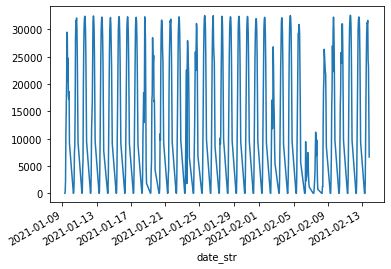

In [15]:
fc_data[-14*36:]['power'].plot()

<AxesSubplot:xlabel='date_str'>

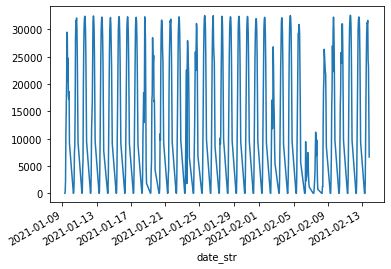

In [16]:
power[-14*36:]['power'].plot()

In [18]:
fc_data
# so for 2020-02-19 the forecasting day would be the 20th of Feb and so on. 
# So this should have the weather of that day

,power,day2,day3,day4,day5,day6,day7
date_str,,,,,,,
2020-02-19 07:00:00,4.97,0.27,0.32,1.43,6.14,4.37,7.22
2020-02-19 08:00:00,3.04,0.17,0.24,0.65,3.44,2.32,3.52
2020-02-19 09:00:00,1138.33,2248.30,1748.39,923.57,521.86,1836.85,1784.07
2020-02-19 10:00:00,7168.95,8251.32,7882.24,3592.28,7987.27,8286.02,405.33
2020-02-19 11:00:00,14716.55,17083.11,16905.52,15675.26,9193.46,15647.94,16232.33
...,...,...,...,...,...,...,...
2021-02-13 16:00:00,31655.55,32179.38,32494.80,31042.98,32251.04,23996.89,6906.75
2021-02-13 17:00:00,24439.01,30238.12,30735.79,30993.51,30274.60,22335.87,9784.68
2021-02-13 18:00:00,23174.72,25290.43,26041.20,26365.90,25609.36,21885.46,5715.74


In [17]:
# let's combine weather information

In [74]:
weather = power.iloc[:,1:8].shift(-14)

In [75]:
weather = weather.dropna()

In [76]:
weather

,wind,temperature,dewPoint,cloudCover,humidity,pressure,uvIndex
date_str,,,,,,,
2020-02-13 07:00:00,5.98,26.00,18.91,0.16,0.65,1009.2,0.0
2020-02-13 08:00:00,5.76,26.24,19.25,0.00,0.65,1009.3,0.0
2020-02-13 09:00:00,5.69,26.37,19.61,0.00,0.66,1009.6,0.0
2020-02-13 10:00:00,5.66,26.84,19.99,0.00,0.66,1010.0,0.0
2020-02-13 11:00:00,5.45,27.81,20.39,0.00,0.64,1010.2,2.0
...,...,...,...,...,...,...,...
2021-02-12 16:00:00,3.85,30.09,16.44,0.54,0.44,1012.1,9.0
2021-02-12 17:00:00,4.79,30.82,15.91,0.47,0.41,1011.1,8.0
2021-02-12 18:00:00,5.77,30.59,16.58,0.62,0.43,1010.7,6.0


In [77]:
# now I get data for 02-13 which will actually be data of 02-14 because that's the forecasting day
weather_day = weather_original['2021-02-13 00:00:00': '2021-02-14 23:00:00'].shift(-24).dropna()['2021-02-13 07:00:00': '2021-02-13 20:00:00']

In [78]:
weather_day

,wind,temperature,dewPoint,cloudCover,humidity,pressure,uvIndex
date_str,,,,,,,
2021-02-13 07:00:00,4.15,23.98,12.31,0.60,0.48,1011.0,0.0
2021-02-13 08:00:00,4.29,23.48,12.42,0.57,0.50,1011.1,0.0
2021-02-13 09:00:00,4.49,23.23,13.01,0.47,0.53,1011.5,0.0
2021-02-13 10:00:00,4.73,24.19,14.06,0.53,0.53,1012.3,0.0
2021-02-13 11:00:00,4.82,25.60,14.71,0.56,0.51,1012.4,2.0
2021-02-13 12:00:00,4.67,27.28,14.65,0.57,0.46,1012.9,4.0
2021-02-13 13:00:00,4.26,29.19,15.84,0.55,0.44,1012.9,6.0
2021-02-13 14:00:00,3.91,30.72,15.95,0.54,0.41,1012.8,8.0
2021-02-13 15:00:00,4.06,31.55,15.76,0.60,0.39,1012.2,8.0


In [79]:
weather = weather.append(weather_day)

In [81]:
combined_data = pd.concat([fc_data, weather['2020-02-19 07:00:00':'2021-02-13 20:00:00']], axis=1)

In [82]:
combined_data

,power,day2,day3,day4,day5,day6,day7,wind,temperature,dewPoint,cloudCover,humidity,pressure,uvIndex
date_str,,,,,,,,,,,,,,
2020-02-19 07:00:00,4.97,0.27,0.32,1.43,6.14,4.37,7.22,5.04,25.28,16.70,0.99,0.59,1011.9,0.0
2020-02-19 08:00:00,3.04,0.17,0.24,0.65,3.44,2.32,3.52,5.42,25.24,16.11,1.00,0.57,1012.2,0.0
2020-02-19 09:00:00,1138.33,2248.30,1748.39,923.57,521.86,1836.85,1784.07,5.64,25.21,16.02,0.90,0.57,1013.0,0.0
2020-02-19 10:00:00,7168.95,8251.32,7882.24,3592.28,7987.27,8286.02,405.33,5.71,25.89,16.15,0.78,0.55,1013.2,0.0
2020-02-19 11:00:00,14716.55,17083.11,16905.52,15675.26,9193.46,15647.94,16232.33,5.55,26.44,16.70,0.71,0.55,1013.7,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-13 16:00:00,31655.55,32179.38,32494.80,31042.98,32251.04,23996.89,6906.75,3.48,31.68,16.09,0.68,0.39,1012.0,8.0
2021-02-13 17:00:00,24439.01,30238.12,30735.79,30993.51,30274.60,22335.87,9784.68,3.32,31.17,16.71,0.50,0.42,1011.3,8.0
2021-02-13 18:00:00,23174.72,25290.43,26041.20,26365.90,25609.36,21885.46,5715.74,3.47,30.61,16.30,0.68,0.42,1011.0,6.0
